# MICROSOFT COGNITIVE SERVICES

Here, we will look at calling out to Microsoft's cognitive services from our Jupyter Notebook and having our cloud based AI solutions provide us results.


## Computer Vision Example

Let's give the service a URL to an image we find online and ask it to give us a description of it.

In [1]:
# You need to enter your own subscription keys below. 
# These don't work / are here for reference
vision_key = "4e941f80a402e9b19c223599c7"

face_key = "4cae5af824c2caddbc22941a97"


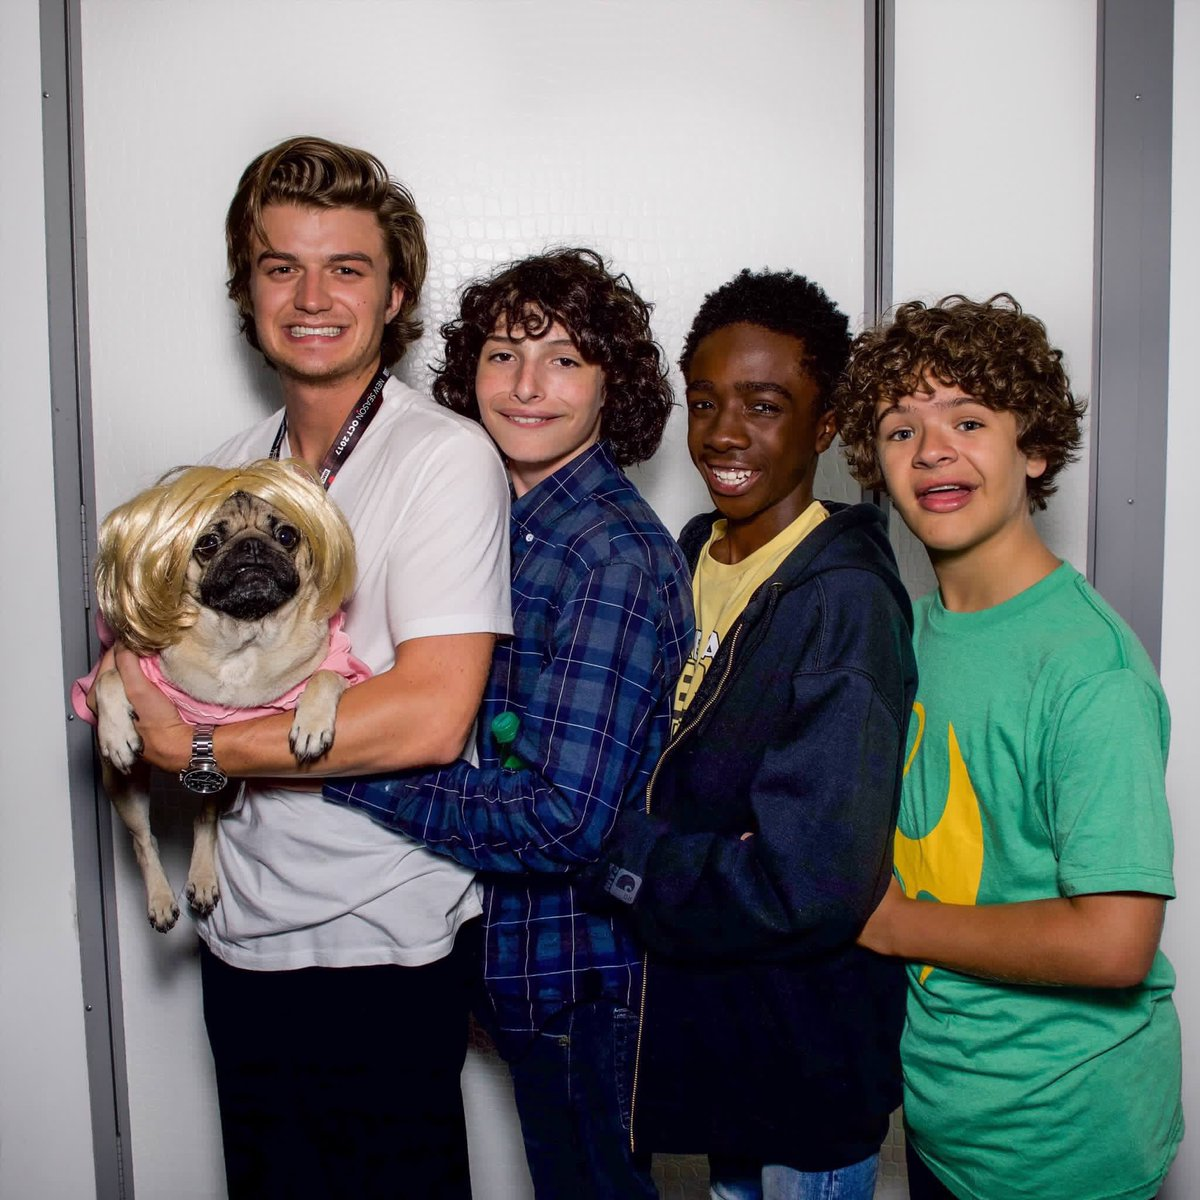

In [2]:
# We explored PIL in our 1st Notebook
from PIL import Image 

# We need 'requests' since we are going to be calling, or making requests, to the Cognitive Services Website
import requests

# Our image request will come back as text, so we need BytesIO to turn it back into machine readable pixel data to display
from io import BytesIO

image_url = "https://pbs.twimg.com/media/DNV_ZH4X0AAZIPv.jpg"

imageResponse = requests.get(image_url)
localImage = Image.open( BytesIO(imageResponse.content))
localImage

In [3]:
# Here is the URL for the COGNITIVE SERVICES vision API we will use...
vision_url = "https://westus.api.cognitive.microsoft.com/vision/v1.0/analyze"

# Setup our request header and parameters
headers  = {'Ocp-Apim-Subscription-Key': vision_key }
params   = {'visualFeatures': 'Categories, Description'}
data     = {'url': image_url}

# send the request and wait for the response
response = requests.post(vision_url, headers=headers, params=params, json=data)
response.raise_for_status()

# Let's see what we description Cognitive Services generated for our image request
analysis = response.json()
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'Joe keery, finn wolfhard, caleb mclaughlin, gaten matarazzo posing for the camera'

In [4]:
#Let's now look at the complete analysis of everything we got...
analysis

{'categories': [{'name': 'people_group',
   'score': 0.87890625,
   'detail': {'celebrities': [{'name': 'Gaten Matarazzo',
      'confidence': 0.9998834133148193,
      'faceRectangle': {'left': 868, 'top': 386, 'width': 142, 'height': 142}},
     {'name': 'Joe Keery',
      'confidence': 0.9988462924957275,
      'faceRectangle': {'left': 247, 'top': 231, 'width': 135, 'height': 135}},
     {'name': 'Caleb McLaughlin',
      'confidence': 0.9980693459510803,
      'faceRectangle': {'left': 664, 'top': 368, 'width': 135, 'height': 135}},
     {'name': 'Finn Wolfhard',
      'confidence': 0.9931800365447998,
      'faceRectangle': {'left': 466,
       'top': 320,
       'width': 132,
       'height': 132}}]}}],
 'description': {'tags': ['person',
   'standing',
   'posing',
   'indoor',
   'woman',
   'photo',
   'man',
   'holding',
   'people',
   'young',
   'front',
   'brown',
   'smiling',
   'group',
   'wearing',
   'dog',
   'food',
   'room',
   'white'],
  'captions': [{'text

## FACE API's ##

In [5]:
!pip install cognitive_face

There are multiple Cognitive Services we can leverage (many with their own unique subscription keys required.) We use the vision service above to pull a 'description' from the image.

Now we will use the FACE api from python, using the cognitive_face python library Microsoft created for ease of use.

In [6]:
# Having a custom Python library makes things much easier
import cognitive_face as CF

# we still need a Cognitive Services FACE API key, though...
CF.Key.set(face_key)

# Making a request with an image URL is only a few lines of code...
CF.BaseUrl.set('https://pyface.cognitiveservices.azure.com/face/v1.0/detect?returnFaceLandmarks=true')
faces = CF.face.detect(image_url, False, False, "age,gender")

# Let's see our results
faces

[{'faceRectangle': {'top': 386, 'left': 868, 'width': 142, 'height': 142},
  'faceAttributes': {'gender': 'female', 'age': 11.0}},
 {'faceRectangle': {'top': 231, 'left': 247, 'width': 135, 'height': 135},
  'faceAttributes': {'gender': 'male', 'age': 25.0}},
 {'faceRectangle': {'top': 368, 'left': 664, 'width': 135, 'height': 135},
  'faceAttributes': {'gender': 'male', 'age': 16.0}},
 {'faceRectangle': {'top': 320, 'left': 466, 'width': 132, 'height': 132},
  'faceAttributes': {'gender': 'female', 'age': 18.0}}]

In [7]:
# Here is how you can loop through all the faces in python
for f in faces:
    print(f["faceRectangle"])

{'top': 386, 'left': 868, 'width': 142, 'height': 142}
{'top': 231, 'left': 247, 'width': 135, 'height': 135}
{'top': 368, 'left': 664, 'width': 135, 'height': 135}
{'top': 320, 'left': 466, 'width': 132, 'height': 132}


In [8]:
# our response includes where the face is located (as shown above) and additional attributes we requested (age & gender)
for f in faces:
    print(f['faceAttributes'])

{'gender': 'female', 'age': 11.0}
{'gender': 'male', 'age': 25.0}
{'gender': 'male', 'age': 16.0}
{'gender': 'female', 'age': 18.0}


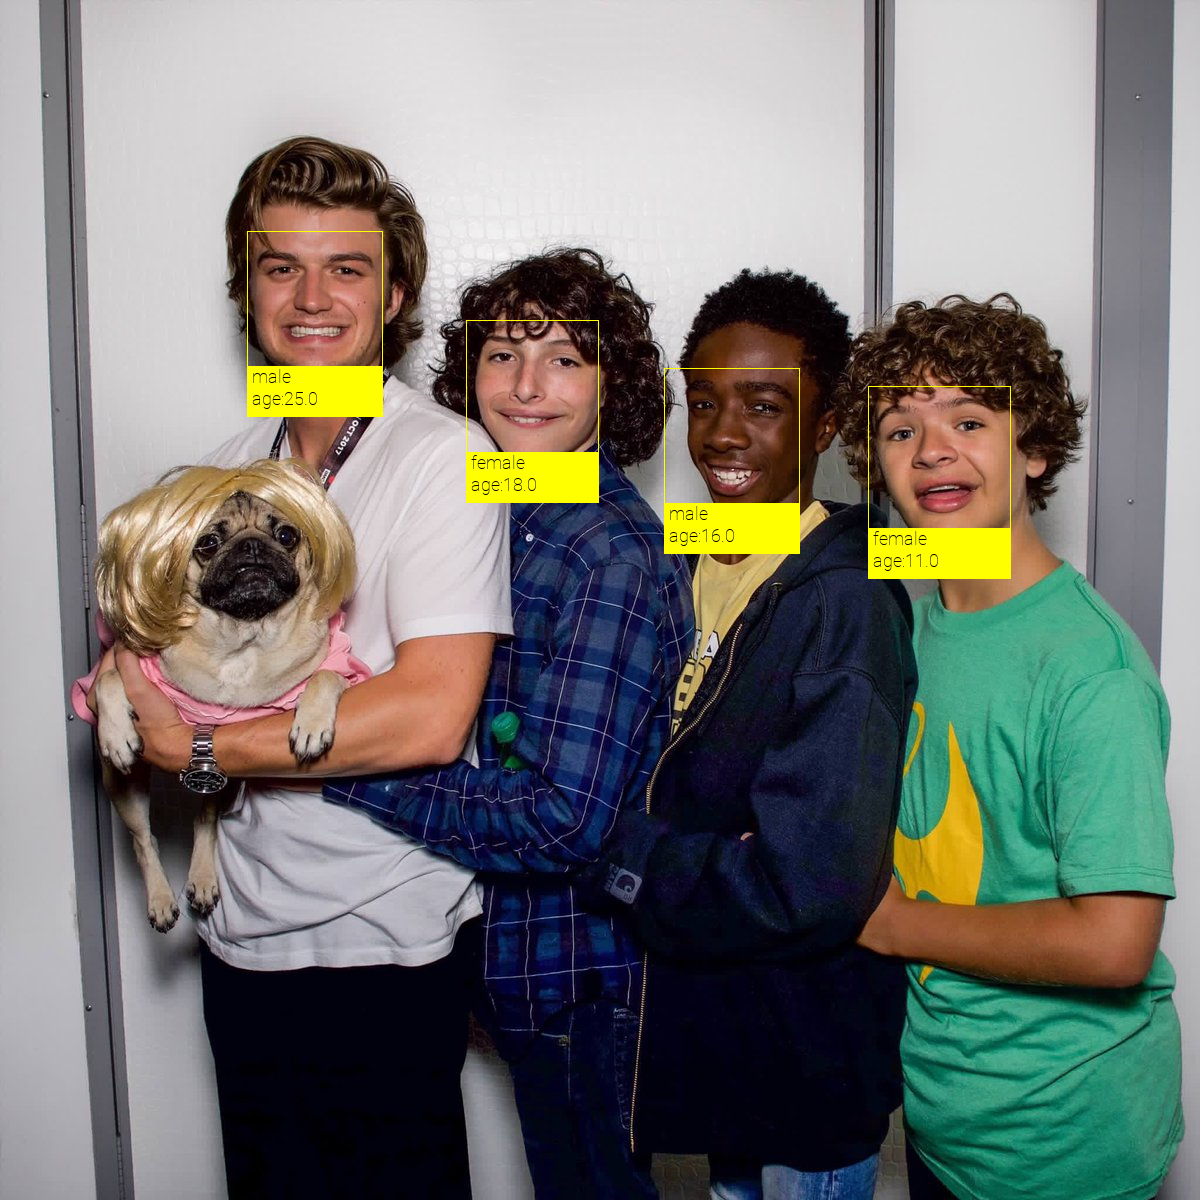

In [9]:
# Let's go ahead and use some Python Imaging tools to draw the detections in our local image
from PIL import ImageDraw
from PIL import ImageFont

# load up a font
font = ImageFont.truetype("Roboto-Thin.ttf", 18)

# create a drawing canvas to draw on our localImage
draw = ImageDraw.Draw(localImage)

# for each face...
for f in faces:
    # find the dimensions of the bounding box
    topX = f['faceRectangle']['left']
    topY = f['faceRectangle']['top']
    bottomX = f['faceRectangle']['left'] + f['faceRectangle']['width']
    bottomY = f['faceRectangle']['top'] + f['faceRectangle']['height']
    
    # draw an outlined box around the face
    draw.rectangle( ((topX, topY),(bottomX, bottomY)), fill=None, outline="yellow" )
    # and draw a solid box below it for our text information
    draw.rectangle( ((topX, bottomY),(bottomX, bottomY + 50)), fill="yellow" )
    
    # add the first line of text to show gender
    draw.text( (topX + 5, bottomY), f['faceAttributes']['gender'], (0,0,0), font=font)
    # and a second line of text to show estimated age
    draw.text( (topX + 5, bottomY + 22), "age:" + str(f['faceAttributes']['age']), (0,0,0), font=font)

# show the final image after our efforts
localImage